In [1]:
!unzip -q images_train_test_val2.zip -d .

In [1]:
!ls -laht

total 236M
drwxr-xr-x 1 root root 4.0K Nov  9 10:56 .
-rw-r--r-- 1 root root 234M Nov  9 10:54 images_train_test_val2.zip
-rw-r--r-- 1 root root 2.3M Nov  9 10:50 model.keras
drwxr-xr-x 1 root root 4.0K Nov  9 10:46 ..
drwxr-xr-x 5 root root 4.0K Nov  8 18:32 images_train_test_val
drwxr-xr-x 1 root root 4.0K Nov  7 20:56 sample_data
drwxr-xr-x 4 root root 4.0K Nov  7 20:56 .config


In [2]:
from tensorflow import keras
import tensorflow as tf

In [3]:
model = tf.keras.models.load_model('model.keras')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (32, 127, 127, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (32, 62, 62, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (32, 30, 30, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (32, 14, 14, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (32, 6, 6, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (32, 2, 2, 64)              │             2

 Total params: 554,449 (2.12 MB)

 Trainable params: 184,581 (721.02 KB)

 Non-trainable params: 704 (2.75 KB)

 Optimizer params: 369,164 (1.41 MB)

In [4]:
train_data = keras.utils.image_dataset_from_directory('./images_train_test_val/train')
val_data = keras.utils.image_dataset_from_directory('./images_train_test_val/validation')
test_data = keras.utils.image_dataset_from_directory('./images_train_test_val/test')

classes = train_data.class_names

Found 1750 files belonging to 5 classes.
Found 500 files belonging to 5 classes.
Found 250 files belonging to 5 classes.


In [5]:
test_score = model.evaluate(test_data)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.8791 - loss: 0.4909


In [6]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


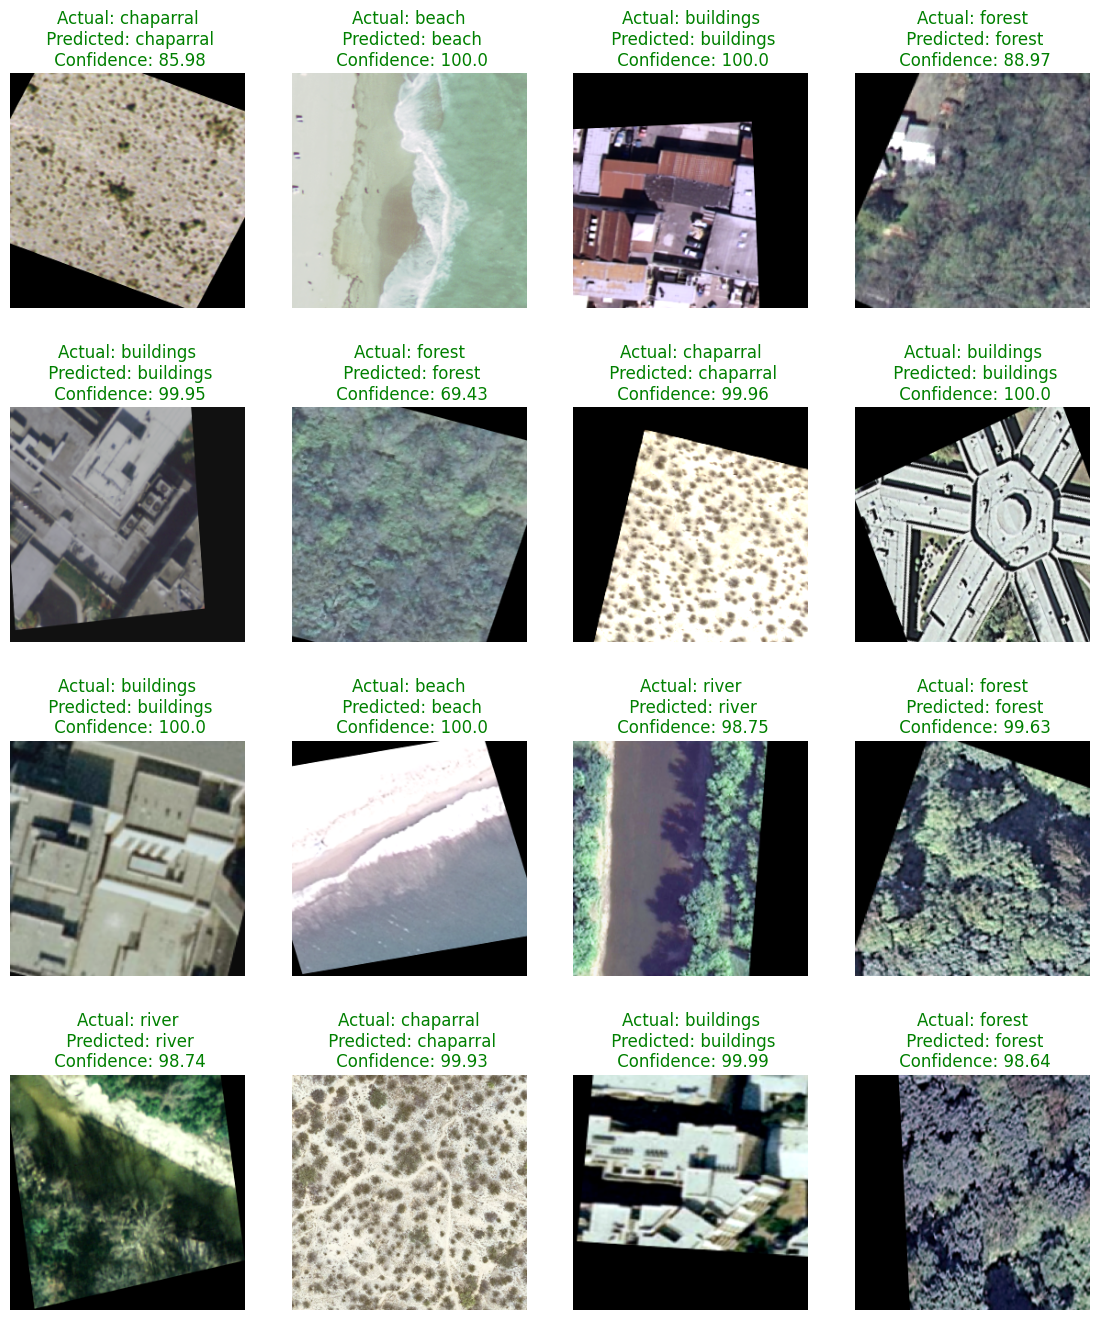

In [7]:
for batch_image, batch_label in test_data.take(1):

    batch_predict_label = model.predict(batch_image)
    plt.figure(figsize=(16, 16))

    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)

        img = batch_image[i].numpy().astype("uint8")
        lbl_actual = classes[batch_label[i].numpy()]
        lbl_pred = classes[np.argmax(batch_predict_label[i])]
        confidence = round((100 * np.max(batch_predict_label[i])), 2)

        if (lbl_pred == lbl_actual):
            plt.title(f"Actual: {lbl_actual}\n Predicted: {lbl_pred}\n Confidence: {confidence}", color='green')
        else:
            plt.title(f"Actual: {lbl_actual}\n Predicted: {lbl_pred}\n Confidence: {confidence}", color='red')
        plt.imshow(img)
        plt.axis("off")